# Plot Control Law Aggregate

This script collects and plots the control-law results as generated by the `chance_constrained_active_inference` and `reference_active_inference` notebooks.

In [1]:
using JLD
using PyPlot
;

## Chance-constrained agent

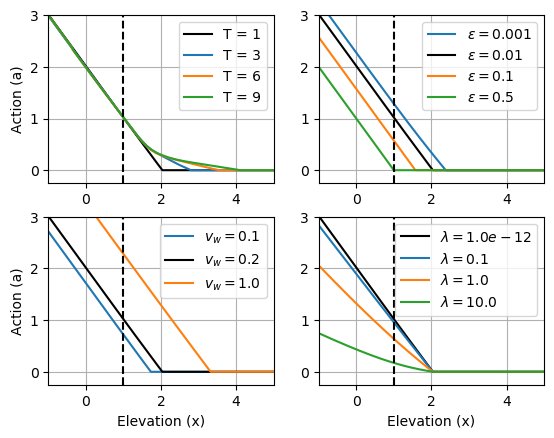

In [2]:
T = 1
epsilon = 0.01
v_w = 0.2
lambda = 1e-12

# Varying T
subplot(2,2,1)
for T_k in [1, 3, 6, 9]
    d = load("figures/ctrl_$(T_k)_$(epsilon)_$(v_w)_$(lambda).jld")
    if T_k == T
        plot(d["x_hat"], d["a"], label="T = $(T_k)", color="black") # Reference plot
    else    
        plot(d["x_hat"], d["a"], label="T = $(T_k)")
    end
end
plot([1.0, 1.0], [-0.25, 3.0], color="black", linestyle="--") # Elevation threshold
xlim(-1,5)
ylim(-0.25, 3)
legend()
grid("on")
ylabel("Action (a)")

T = 1
epsilon = 0.01
v_w = 0.2
lambda = 1e-12

# Varying epsilon
subplot(2,2,2)
for eps_k in [0.001, 0.01, 0.1, 0.5]
    d = load("figures/ctrl_$(T)_$(eps_k)_$(v_w)_$(lambda).jld")
    if eps_k == epsilon
        plot(d["x_hat"], d["a"], label=L"\epsilon = %$(eps_k)", color="black") # Reference plot
    else
        plot(d["x_hat"], d["a"], label=L"\epsilon = %$(eps_k)")
    end
end
plot([1.0, 1.0], [-0.25, 3.0], color="black", linestyle="--") # Elevation threshold
xlim(-1,5)
ylim(-0.25, 3)
legend()
grid("on")

# Varying v_w
subplot(2,2,3)
for v_w_k in [0.1, 0.2, 1.0]
    d = load("figures/ctrl_$(T)_$(epsilon)_$(v_w_k)_$(lambda).jld")
    if v_w_k == v_w
        plot(d["x_hat"], d["a"], label=L"v_w = %$(v_w_k)", color="black") # Reference plot
    else
        plot(d["x_hat"], d["a"], label=L"v_w = %$(v_w_k)")
    end
end
plot([1.0, 1.0], [-0.25, 3.0], color="black", linestyle="--") # Elevation threshold
xlim(-1,5)
ylim(-0.25, 3)
legend()
grid("on")
xlabel("Elevation (x)")
ylabel("Action (a)")

# Varying lambda
subplot(2,2,4)
for lambda_k in [1e-12, 0.1, 1.0, 10.0]
    d = load("figures/ctrl_$(T)_$(epsilon)_$(v_w)_$(lambda_k).jld")
    if lambda_k == lambda
        plot(d["x_hat"], d["a"], label=L"\lambda = %$(lambda_k)", color="black") # Reference plot
    else
        plot(d["x_hat"], d["a"], label=L"\lambda = %$(lambda_k)")
    end
end
plot([1.0, 1.0], [-0.25, 3.0], color="black", linestyle="--") # Elevation threshold
xlim(-1,5)
ylim(-0.25, 3)
legend()
grid("on")
xlabel("Elevation (x)")

savefig("./figures/control_law_$(T)_$(epsilon)_$(v_w)_$(lambda).png", dpi=300)
;

## Reference agent

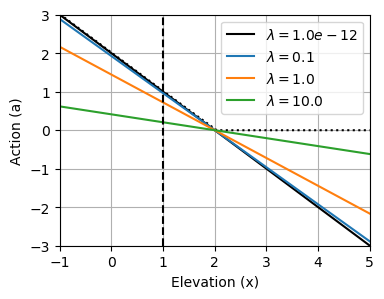

In [7]:
# Control law for reference agent does not vary with T and v_w

T = 1
m_goal = 2.0
v_goal = 0.18478 # Goal prior variance for epsilon=0.01
v_w = 0.2
lambda = 1e-12

figure(figsize=(4,3))

# Chance-constrained result for comparison
d = load("figures/ctrl_$(T)_0.01_$(v_w)_$(lambda).jld")
plot(d["x_hat"], d["a"], label="", color="black", linestyle=":")

# Varying lambda
for lambda_k in [1e-12, 0.1, 1.0, 10.0]
    d = load("figures/ctrl_reference_$(T)_$(m_goal)_$(v_goal)_$(v_w)_$(lambda_k).jld")
    if lambda_k == lambda
        plot(d["x_hat"], d["a"], label=L"\lambda = %$(lambda_k)", color="black") # Reference plot
    else
        plot(d["x_hat"], d["a"], label=L"\lambda = %$(lambda_k)")
    end
end
    
plot([1.0, 1.0], [-3.0, 3.0], color="black", linestyle="--") # Elevation threshold
xlim(-1,5)
ylim(-3, 3)
legend()
grid("on")
xlabel("Elevation (x)")
ylabel("Action (a)")

savefig("./figures/control_law_reference_$(T)_$(m_goal)_$(v_goal)_$(v_w)_$(lambda).png", dpi=300, bbox_inches="tight")
;